## Importing the required libraries

In [245]:
import tensorflow as tf
import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras.layers import Input,Dense, Lambda, Flatten, Conv2D,MaxPooling2D
from tensorflow.keras.models import Model, Sequential,load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from glob import glob
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import numpy as np
import PIL
import os,shutil
from PIL import Image
import matplotlib.pyplot as plt
from keras.models import Sequential
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
import keras.layers.normalization
from keras.layers.normalization import BatchNormalization
import re
#from fastai import *
from tqdm import tqdm
#from fastai.vision import *
#from fastai.vision.data import ImageDataLoaders

### Using OS library and creating new folders for train, test and validation

In [184]:
#Creating a directory named classification
main_directory = 'classification'
#Unix command to create a directory
os.mkdir(main_directory)
#Creating sub directories for the Train, Test and Validation
#First creating sub directory for the training data
train_data = os.path.join(main_directory,'train_data')
os.mkdir(train_data)
#Creating sub directory for the Validation data
validation_data = os.path.join(main_directory,'validation_data')
os.mkdir(validation_data)
#Creating sub directory for the test data
test_data = os.path.join(main_directory,'test_data')
os.mkdir(test_data)

#Creating sub folders for the type of images
train_cats = os.path.join(train_data,'cats')
train_dogs = os.path.join(train_data,'dogs')
train_panda = os.path.join(train_data,'panda')
os.mkdir(train_cats)
os.mkdir(train_dogs)
os.mkdir(train_panda)

#Creating sub folders in the validation folder
validation_cats = os.path.join(validation_data,'cats')
validation_dogs = os.path.join(validation_data,'dogs')
validation_panda = os.path.join(validation_data,'panda')
os.mkdir(validation_cats)
os.mkdir(validation_dogs)
os.mkdir(validation_panda)

#Creating subfoldes in the test folder
test_cats = os.path.join(test_data,'cats')
test_dogs = os.path.join(test_data,'dogs')
test_panda = os.path.join(test_data,'panda')
os.mkdir(test_cats)
os.mkdir(test_dogs)
os.mkdir(test_panda)



In [185]:
cat_dir = 'C:/Users/bduser/Desktop/images/cats'
dog_dir = 'C:/Users/bduser/Desktop/images/dogs'
panda_dir = 'C:/Users/bduser/Desktop/images/panda'
#Copying images to the train cat directory
fnames = ['cats_{:05d}.jpg'.format(i) for i in range(1,701)]
for i in fnames:
    source = os.path.join(cat_dir,i)
    dest = os.path.join(train_cats,i)
    shutil.copyfile(source, dest)
    

#Copying images to the test cat directory
fname = ['cats_{:05d}.jpg'.format(i) for i in range(701,801)]
for i in fname:
    source = os.path.join(cat_dir,i)
    dest = os.path.join(test_cats,i)
    shutil.copyfile(source,dest)

#Copying images to the validation cat directory
fname = ['cats_{:05d}.jpg'.format(i) for i in range(801,1000)]
for i in fname:
    source = os.path.join(cat_dir,i)
    dest = os.path.join(validation_cats,i)
    shutil.copyfile(source,dest)

#Copying images to the train dog directory
fname = ['dogs_{:05d}.jpg'.format(i) for i in range(1,701)]
for i in fname:
    source = os.path.join(dog_dir,i)
    dest = os.path.join(train_dogs,i)
    shutil.copyfile(source,dest)

#Copying images to the test dog directory
fname = ['dogs_{:05d}.jpg'.format(i) for i in range(701,801)]
for i in fname:
    source = os.path.join(dog_dir,i)
    dest = os.path.join(test_dogs,i)
    shutil.copyfile(source,dest)

#Copying images to the validation dog directory
fname = ['dogs_{:05d}.jpg'.format(i) for i in range(801,1000)]
for i in fname:
    source = os.path.join(dog_dir,i)
    dest = os.path.join(validation_dogs,i)
    shutil.copyfile(source,dest)
    

#Copying images to the train panda directory
fname = ['panda_{:05d}.jpg'.format(i) for i in range(1,701)]
for i in fname:
    source = os.path.join(panda_dir,i)
    dest = os.path.join(train_panda,i)
    shutil.copyfile(source,dest)

#Copying images to the test dog directory
fname = ['panda_{:05d}.jpg'.format(i) for i in range(701,801)]
for i in fname:
    source = os.path.join(panda_dir,i)
    dest = os.path.join(test_panda,i)
    shutil.copyfile(source,dest)

#Copying images to the validation dog directory
fname = ['panda_{:05d}.jpg'.format(i) for i in range(801,1000)]
for i in fname:
    source = os.path.join(panda_dir,i)
    dest = os.path.join(validation_panda,i)
    shutil.copyfile(source,dest)

### Preprocessing the image data using ImageDataGenerator

In [186]:
#Performing some transformations to the image data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
#Applying some transformations to the traning data 
train_generator = train_datagen.flow_from_directory(train_data,
                                                    target_size = (255,255),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    subset='training')


Found 1680 images belonging to 3 classes.


In [187]:
#Applying some transformations to the test data 
validation_generator = train_datagen.flow_from_directory(validation_data,
                                                         target_size=(255,255),
                                                         batch_size=32,
                                                         class_mode='categorical',
                                                         subset='validation')

Found 117 images belonging to 3 classes.


In [188]:
#Checking the labels of the dataset using class_indices
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : cats
1 : dogs
2 : panda


In [189]:
k = np.argmax(train_generator[0][1][0])
k

1

In [190]:
#printing out the type
type(train_generator),train_generator.image_shape

(tensorflow.python.keras.preprocessing.image.DirectoryIterator, (255, 255, 3))

In [191]:
train_generator[0][1][0]

array([0., 1., 0.], dtype=float32)

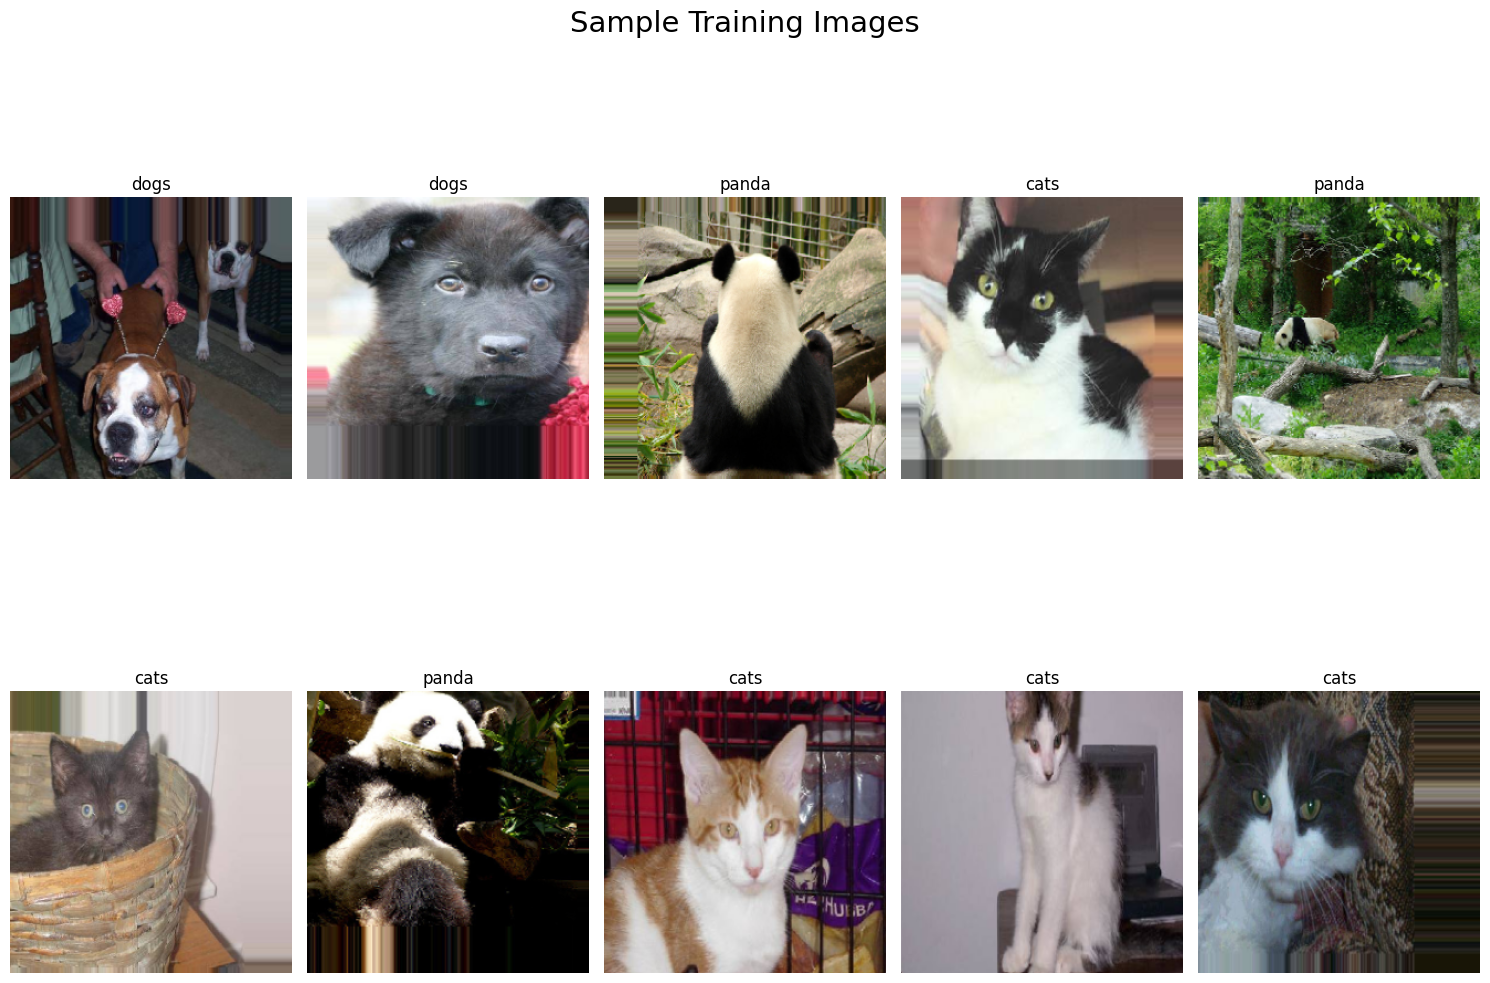

In [192]:
#plotting some images with labels using imshow and numpy argmax
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

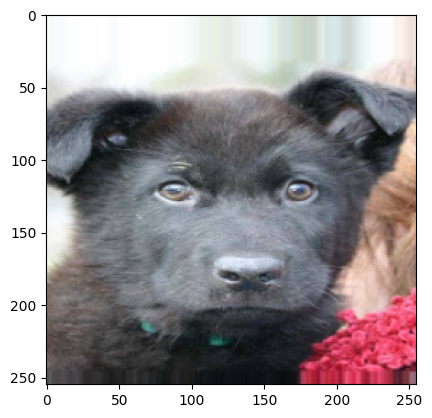

In [193]:
plt.imshow(train_generator[0][0][1])

### Creating a CNN model 

In [ ]:
def model_builder(hp):
    tf.keras.backend.clear_session()
    model=Sequential()
    model.add(Conv2D(filters=128,kernel_size=(5,5),padding='valid',activation='relu',input_shape=(255,255,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(255,255,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(255,255,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Flatten())
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3,activation='softmax'))
    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-512

    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
            loss=keras.losses.CategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

    return model

### Using tuner to tune the model to get the better values

In [283]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=30,
                     factor=3,
                     directory='my_dir2',
                     project_name='model_tuning')

In [284]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [285]:
tuner.search(train_generator,validation_data = validation_generator, epochs=30, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 90 Complete [00h 06m 56s]
val_accuracy: 0.6239316463470459

Best val_accuracy So Far: 0.7606837749481201
Total elapsed time: 02h 05m 31s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 64 and the optimal learning rate for the optimizer
is 0.0001.



In [287]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_generator, validation_data = validation_generator, epochs=50)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
53/53 [==============================] - 19s 339ms/step - loss: 1.3873 - accuracy: 0.5250 - val_loss: 1.6005 - val_accuracy: 0.3333
Epoch 2/50
53/53 [==============================] - 15s 288ms/step - loss: 1.2205 - accuracy: 0.5673 - val_loss: 2.3673 - val_accuracy: 0.3333
Epoch 3/50
53/53 [==============================] - 15s 289ms/step - loss: 1.1135 - accuracy: 0.5905 - val_loss: 2.4467 - val_accuracy: 0.3333
Epoch 4/50
53/53 [==============================] - 15s 287ms/step - loss: 1.0857 - accuracy: 0.6018 - val_loss: 2.3529 - val_accuracy: 0.3333
Epoch 5/50
53/53 [==============================] - 15s 289ms/step - loss: 0.9547 - accuracy: 0.6214 - val_loss: 2.1175 - val_accuracy: 0.3248
Epoch 6/50
53/53 [==============================] - 15s 287ms/step - loss: 0.9764 - accuracy: 0.6065 - val_loss: 2.8736 - val_accuracy: 0.3675
Epoch 7/50
53/53 [==============================] - 16s 295ms/step - loss: 0.9416 - accuracy: 0.6262 - val_loss: 2.1964 - val_accuracy: 0.3419

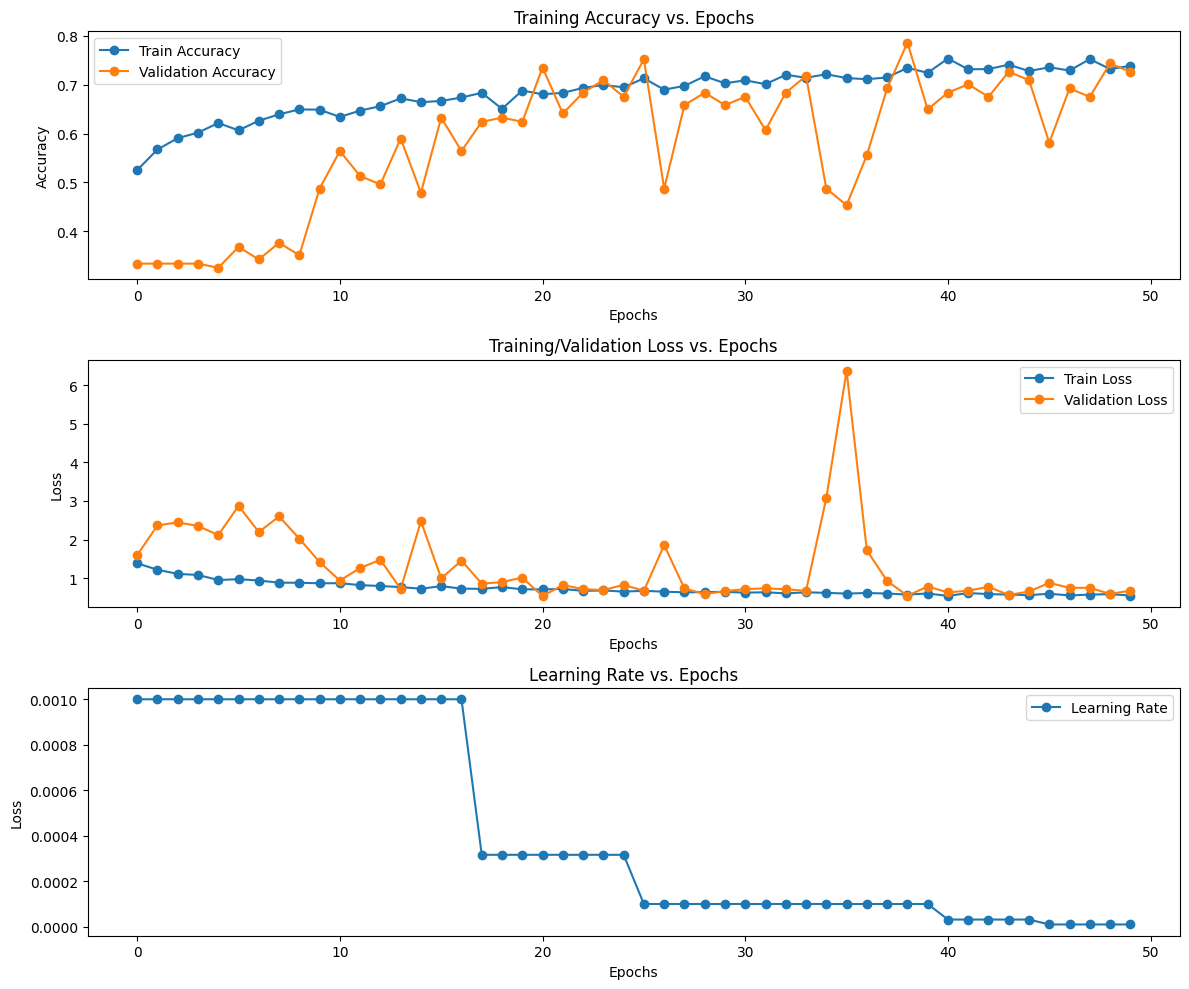

In [289]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

learning_rate = h.history['lr']
#Plotting the graphs
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

#Plotting training accuracy and validation accuracy wrt epochs
ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

#Plotting training loss and validation loss wrt epochs
ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

#Plotting learning rate wrt epochs
ax[2].set_title('Learning Rate vs. Epochs')
ax[2].plot(learning_rate, 'o-', label='Learning Rate')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].legend(loc='best')

plt.tight_layout()
plt.show()

In [301]:
def model_creation():
    model=Sequential()
    model.add(Conv2D(filters=128,kernel_size=(5,5),padding='valid',activation='relu',input_shape=(255,255,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(255,255,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(255,255,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3,activation='softmax'))
    return model

In [302]:
#Summarizing created model
classification_model = model_creation()
classification_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 251, 251, 128)     9728      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 125, 125, 128)     0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 125, 125, 128)     512       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 123, 123, 64)      73792     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 59, 59, 32)       

In [308]:
#keras.utils.plot_model(classification_model, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [303]:
#Compiling model
classification_model.compile(optimizer=Adam(learning_rate=0.001), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [200]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

In [201]:
#Fitting the model
h = classification_model.fit(train_generator, epochs=50, validation_data=validation_generator,
                       verbose=2,
                       callbacks=[reduce_lr])

Epoch 1/50
53/53 - 24s - loss: 6.2480 - accuracy: 0.5262 - val_loss: 6.2603 - val_accuracy: 0.3504
Epoch 2/50
53/53 - 14s - loss: 5.4173 - accuracy: 0.5613 - val_loss: 4.6306 - val_accuracy: 0.4017
Epoch 3/50
53/53 - 14s - loss: 3.6523 - accuracy: 0.5458 - val_loss: 3.1057 - val_accuracy: 0.3932
Epoch 4/50
53/53 - 14s - loss: 2.3413 - accuracy: 0.5798 - val_loss: 2.4993 - val_accuracy: 0.2991
Epoch 5/50
53/53 - 14s - loss: 1.5718 - accuracy: 0.6077 - val_loss: 1.7944 - val_accuracy: 0.4103
Epoch 6/50
53/53 - 14s - loss: 1.0966 - accuracy: 0.5827 - val_loss: 1.1801 - val_accuracy: 0.3932
Epoch 7/50
53/53 - 14s - loss: 0.8367 - accuracy: 0.6226 - val_loss: 1.1750 - val_accuracy: 0.4701
Epoch 8/50
53/53 - 14s - loss: 0.8016 - accuracy: 0.6387 - val_loss: 1.5458 - val_accuracy: 0.3761
Epoch 9/50
53/53 - 14s - loss: 0.7826 - accuracy: 0.6310 - val_loss: 2.4184 - val_accuracy: 0.4188
Epoch 10/50
53/53 - 14s - loss: 0.7429 - accuracy: 0.6393 - val_loss: 0.7555 - val_accuracy: 0.5812
Epoch 11/

In [288]:
train_accuracy = h.history['accuracy']
val_accuracy = h.history['val_accuracy']

train_loss = h.history['loss']
val_loss = h.history['val_loss']

learning_rate = h.history['lr']

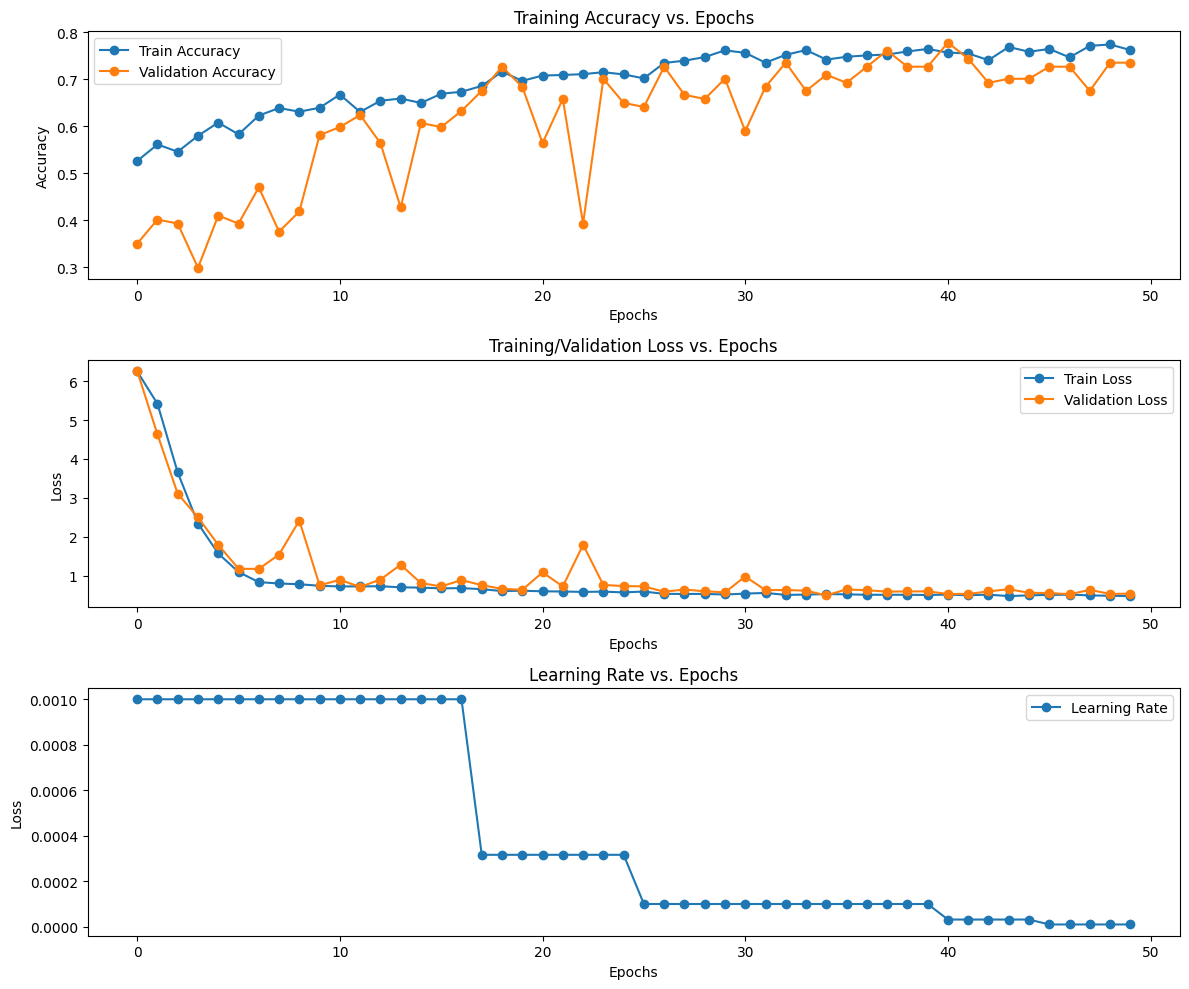

In [203]:
#Plotting the graphs
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

#Plotting training accuracy and validation accuracy wrt epochs
ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

#Plotting training loss and validation loss wrt epochs
ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

#Plotting learning rate wrt epochs
ax[2].set_title('Learning Rate vs. Epochs')
ax[2].plot(learning_rate, 'o-', label='Learning Rate')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].legend(loc='best')

plt.tight_layout()
plt.show()

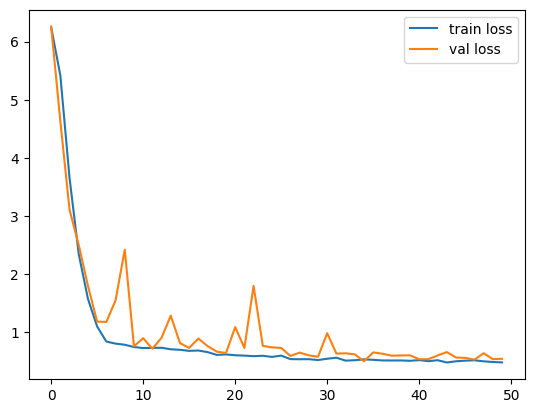

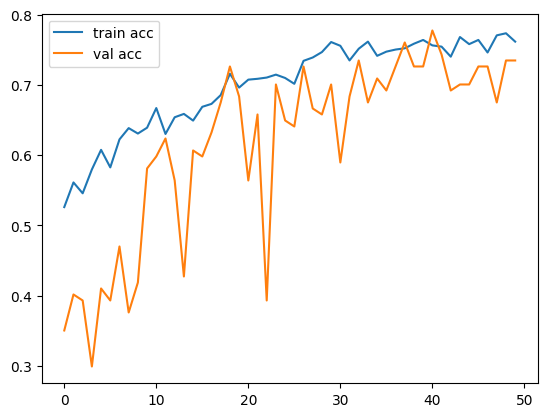

<Figure size 640x480 with 0 Axes>

In [204]:
# plot the loss
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(h.history['accuracy'], label='train acc')
plt.plot(h.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# Transfer Learning Google's VGG19

In [205]:
#importing the required library
from tensorflow.keras.applications.vgg19 import VGG19

In [206]:
#Giving the image size for the model
IMAGE_SIZE = [255, 255]
#Intialising the model uisng VGG19 
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in vgg19.layers:
    layer.trainable = False
folders = glob('C:/Users/bduser/Desktop/classification/train_data/*')

In [207]:
#Flattening for output
x = Flatten()(vgg19.output)

In [208]:
#Defining output layer
prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [209]:
# Summarizing the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 255, 255, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 255, 255, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 255, 255, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 127, 127, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 127, 127, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 127, 127, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 63, 63, 128)       0     

In [210]:
#Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [171]:
#Fitting the model with 100 epochs
model.fit(train_generator, epochs=100, validation_data=validation_generator,
                       verbose=2,
                       callbacks=[reduce_lr])

Epoch 1/100
53/53 - 24s - loss: 1.0394 - accuracy: 0.6244 - val_loss: 0.4586 - val_accuracy: 0.8667
Epoch 2/100
53/53 - 16s - loss: 0.4339 - accuracy: 0.8196 - val_loss: 0.5512 - val_accuracy: 0.7750
Epoch 3/100
53/53 - 16s - loss: 0.4176 - accuracy: 0.8268 - val_loss: 0.5951 - val_accuracy: 0.7333
Epoch 4/100
53/53 - 16s - loss: 0.4122 - accuracy: 0.8411 - val_loss: 0.3374 - val_accuracy: 0.8750
Epoch 5/100
53/53 - 16s - loss: 0.3628 - accuracy: 0.8631 - val_loss: 0.3244 - val_accuracy: 0.8917
Epoch 6/100
53/53 - 16s - loss: 0.3207 - accuracy: 0.8732 - val_loss: 0.4353 - val_accuracy: 0.8333
Epoch 7/100
53/53 - 16s - loss: 0.3036 - accuracy: 0.8738 - val_loss: 0.3813 - val_accuracy: 0.8750
Epoch 8/100
53/53 - 16s - loss: 0.2748 - accuracy: 0.8821 - val_loss: 0.2946 - val_accuracy: 0.8917
Epoch 9/100
53/53 - 16s - loss: 0.2853 - accuracy: 0.8827 - val_loss: 0.5900 - val_accuracy: 0.8083
Epoch 10/100
53/53 - 16s - loss: 0.3158 - accuracy: 0.8804 - val_loss: 0.2945 - val_accuracy: 0.8833

Epoch 83/100
53/53 - 19s - loss: 0.1503 - accuracy: 0.9488 - val_loss: 0.3226 - val_accuracy: 0.8833
Epoch 84/100
53/53 - 19s - loss: 0.1483 - accuracy: 0.9554 - val_loss: 0.2925 - val_accuracy: 0.9000
Epoch 85/100
53/53 - 18s - loss: 0.1615 - accuracy: 0.9357 - val_loss: 0.3022 - val_accuracy: 0.8750
Epoch 86/100
53/53 - 19s - loss: 0.1546 - accuracy: 0.9464 - val_loss: 0.2968 - val_accuracy: 0.8583
Epoch 87/100
53/53 - 19s - loss: 0.1487 - accuracy: 0.9512 - val_loss: 0.3118 - val_accuracy: 0.9083
Epoch 88/100
53/53 - 19s - loss: 0.1568 - accuracy: 0.9423 - val_loss: 0.3376 - val_accuracy: 0.9000
Epoch 89/100
53/53 - 19s - loss: 0.1571 - accuracy: 0.9405 - val_loss: 0.2624 - val_accuracy: 0.9250
Epoch 90/100
53/53 - 20s - loss: 0.1605 - accuracy: 0.9429 - val_loss: 0.2492 - val_accuracy: 0.8833
Epoch 91/100
53/53 - 19s - loss: 0.1628 - accuracy: 0.9417 - val_loss: 0.2483 - val_accuracy: 0.9250
Epoch 92/100
53/53 - 17s - loss: 0.1619 - accuracy: 0.9387 - val_loss: 0.2665 - val_accurac

In [211]:
#Fitting the model with 30 epochs
k = model.fit(train_generator, epochs=30, validation_data=validation_generator,
                       verbose=2,
                       callbacks=[reduce_lr])

Epoch 1/30
53/53 - 19s - loss: 0.9209 - accuracy: 0.6554 - val_loss: 0.5751 - val_accuracy: 0.7778
Epoch 2/30
53/53 - 16s - loss: 0.5136 - accuracy: 0.7982 - val_loss: 0.3426 - val_accuracy: 0.8632
Epoch 3/30
53/53 - 16s - loss: 0.3996 - accuracy: 0.8381 - val_loss: 0.4680 - val_accuracy: 0.8547
Epoch 4/30
53/53 - 16s - loss: 0.3369 - accuracy: 0.8649 - val_loss: 0.3258 - val_accuracy: 0.8803
Epoch 5/30
53/53 - 16s - loss: 0.3464 - accuracy: 0.8577 - val_loss: 0.3274 - val_accuracy: 0.8889
Epoch 6/30
53/53 - 16s - loss: 0.3110 - accuracy: 0.8827 - val_loss: 0.3133 - val_accuracy: 0.8803
Epoch 7/30
53/53 - 17s - loss: 0.2898 - accuracy: 0.8833 - val_loss: 0.2291 - val_accuracy: 0.8889
Epoch 8/30
53/53 - 16s - loss: 0.2771 - accuracy: 0.8863 - val_loss: 0.3595 - val_accuracy: 0.8974
Epoch 9/30
53/53 - 16s - loss: 0.2897 - accuracy: 0.8929 - val_loss: 0.3450 - val_accuracy: 0.9231
Epoch 10/30
53/53 - 16s - loss: 0.2540 - accuracy: 0.9018 - val_loss: 0.3206 - val_accuracy: 0.9060
Epoch 11/

# Using this we got validation accuracy of almost 91%

In [212]:
#Assigning the train_accuracy, val_acc,train_loss
train_accuracy = k.history['accuracy']
val_accuracy = k.history['val_accuracy']

train_loss = k.history['loss']
val_loss = k.history['val_loss']

learning_rate = k.history['lr']

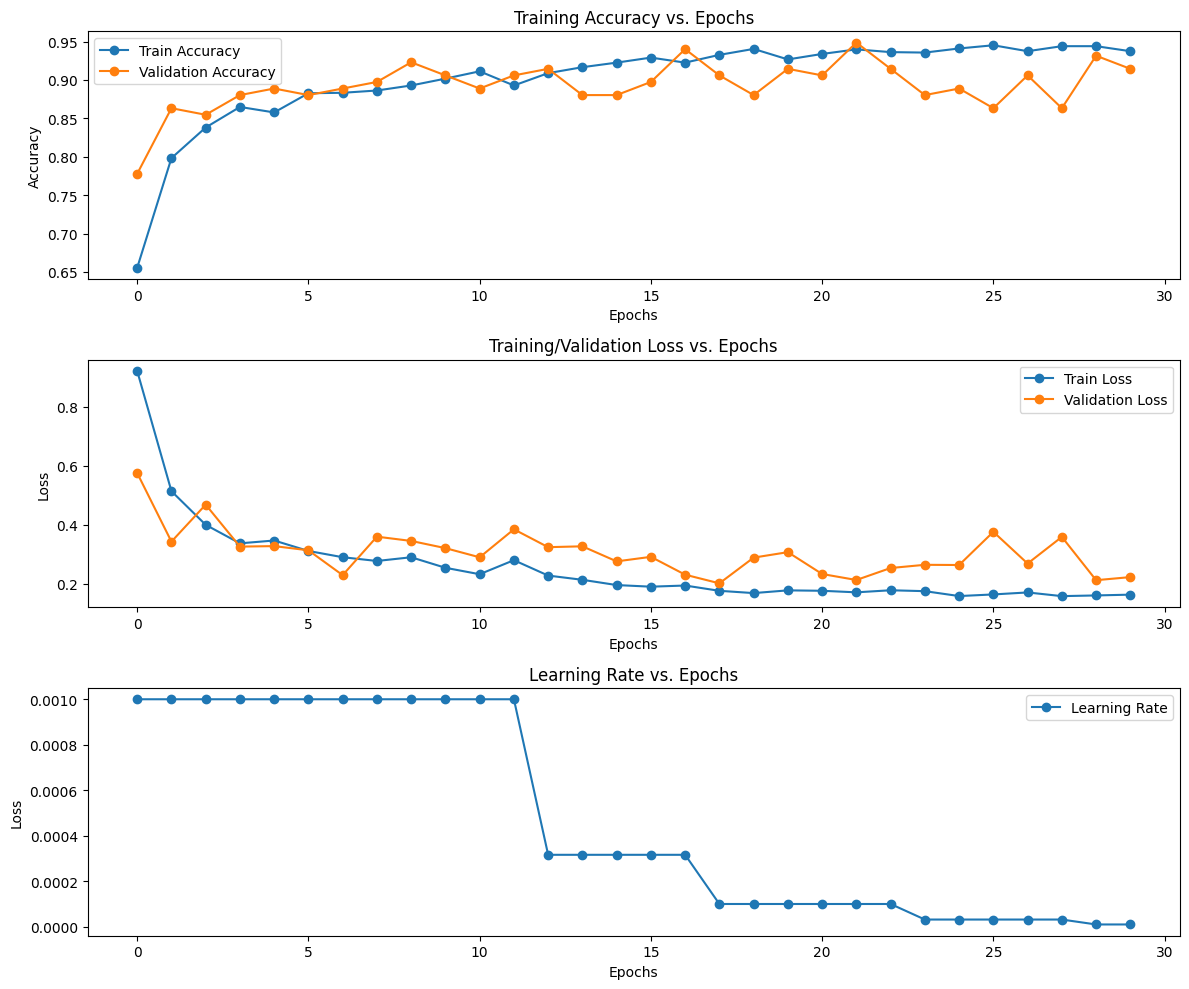

In [213]:
#Plotting the graphs
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

#Plotting training accuracy and validation accuracy wrt epochs
ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

#Plotting training loss and validation loss wrt epochs
ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

#Plotting learning rate wrt epochs
ax[2].set_title('Learning Rate vs. Epochs')
ax[2].plot(learning_rate, 'o-', label='Learning Rate')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].legend(loc='best')

plt.tight_layout()
plt.show()

# Testing the model by giving a image

This image most likely belongs to panda.


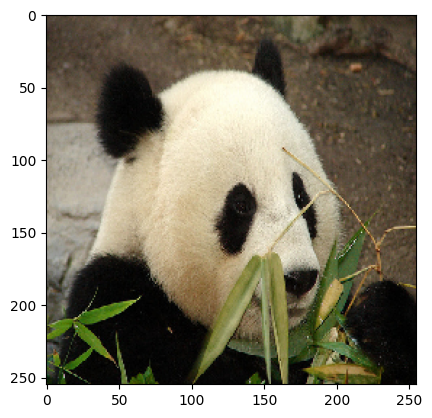

In [222]:
path = "C:/Users/bduser/Desktop/classification/test_data/panda/panda_00728.jpg"
img = tf.keras.utils.load_img(
    path, target_size=(255, 255)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
plt.imshow(img)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {}."
    .format(labels[np.argmax(score)])
)

In [223]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [227]:
test_d = test_datagen.flow_from_directory(test_data,
                                         target_size = (255,255),
                                         class_mode='categorical')

Found 300 images belonging to 3 classes.


In [228]:
pred = model.predict(test_d)

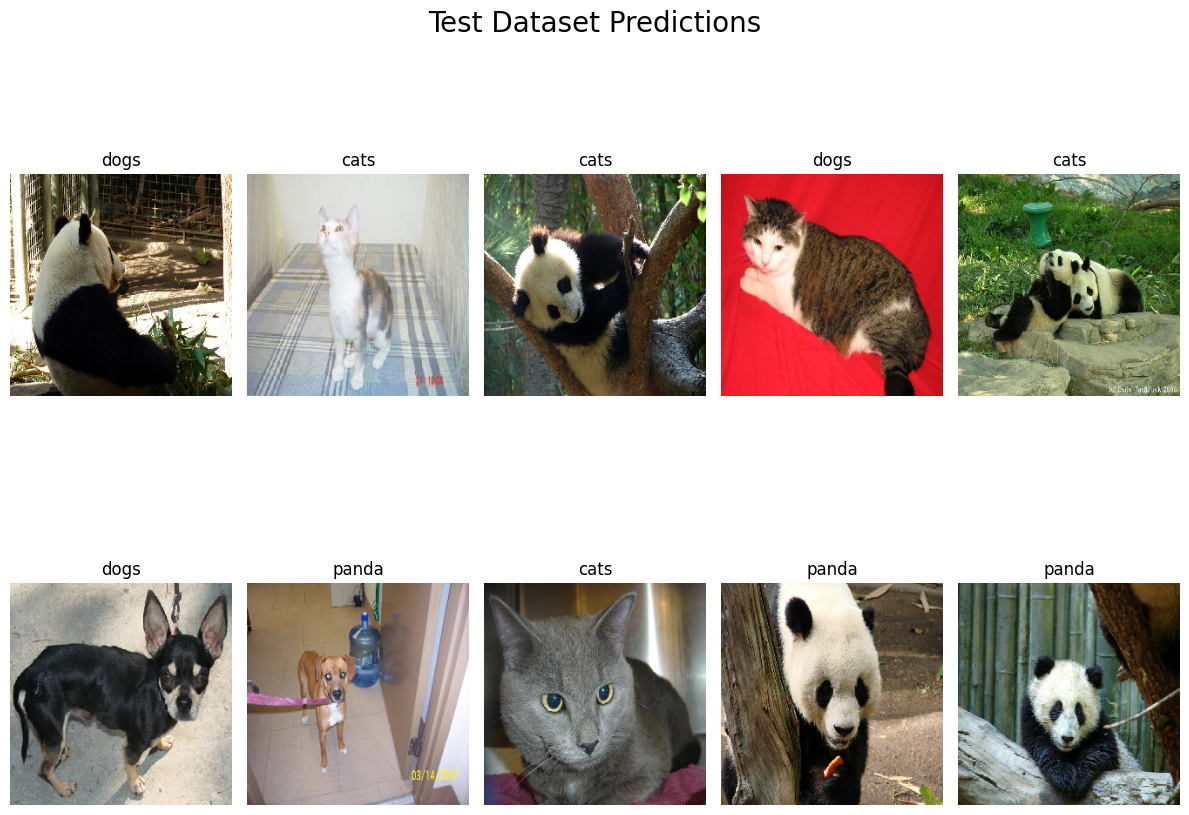

In [238]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        predicted_label = labels[np.argmax(pred[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_d[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

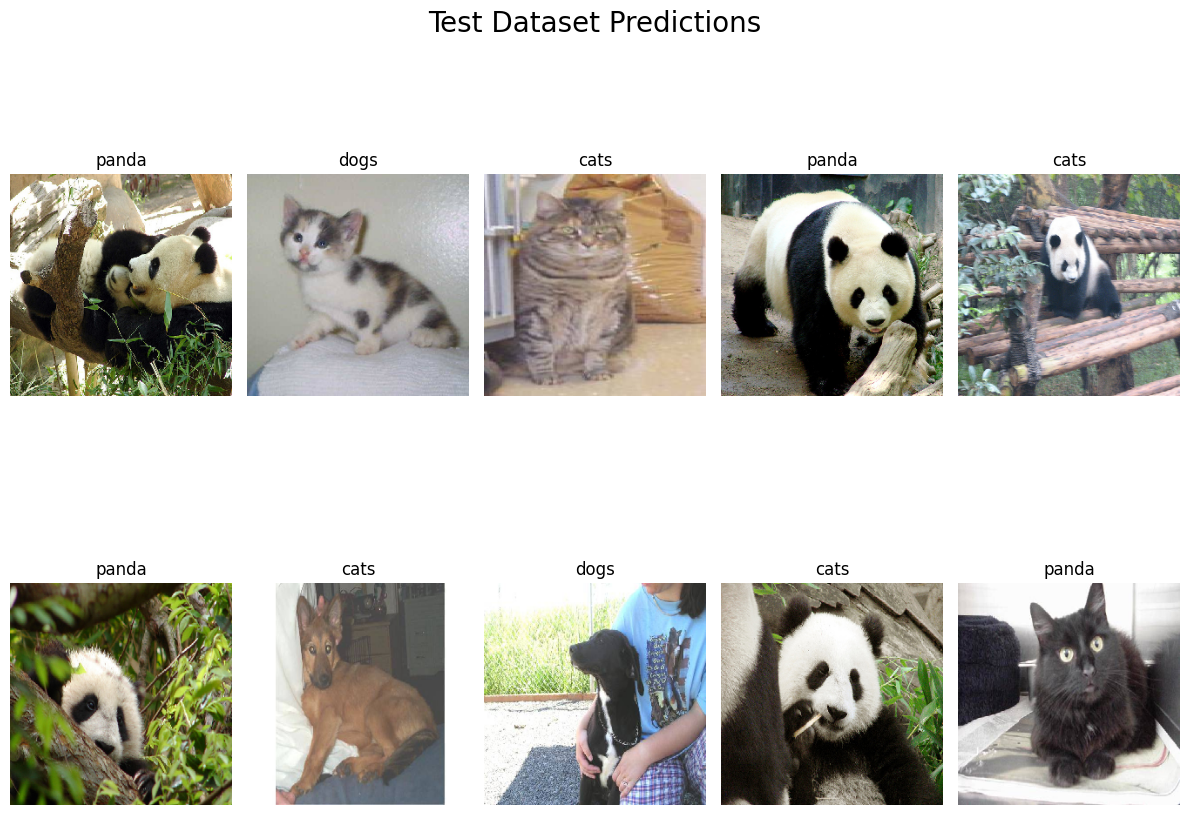

In [240]:
pred1 = classification_model.predict(test_d)
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        predicted_label = labels[np.argmax(pred1[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_d[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()
